# Predictive Analytics Project: [Prediksi Harga Tiket Pesawat]
- **Nama:** [Amanda Riyas Utami]
- **Email:** [amandariyas12@gmail.com]
- **ID Dicoding:** [MC223D5X0901]
- **Link Dataset:** https://www.kaggle.com/datasets/viveksharmar/flight-price-data

## Domain Proyek
Proyek ini berfokus pada penerapan machine learning untuk memprediksi harga tiket pesawat berdasarkan data historis yang tersedia secara publik. Industri penerbangan merupakan salah satu sektor dengan dinamika harga yang sangat tinggi, sehingga menjadi tantangan menarik dalam pengembangan model prediktif yang andal.
Dataset yang digunakan mencakup berbagai fitur seperti maskapai penerbangan, asal dan tujuan, durasi penerbangan, waktu keberangkatan dan kedatangan, serta jumlah transit. Fitur-fitur ini dinilai relevan karena secara logis memiliki pengaruh terhadap fluktuasi harga tiket.
Pada penelitian sebelumnya, prediksi harga tiket pesawat menggunakan Logistic Regression, Random Forest, dan Gradient Boosting menunjukkan bahwa Random Forest menghasilkan performa lebih baik dibanding dua model lainnya (Zebua et al., 2022). Berdasarkan hal tersebut, proyek ini mengimplementasikan tiga algoritma regresi K-Nearest Neighbors (KNN), Random Forest, dan Boosting Algorithm karena masing-masing memiliki keunggulan dalam menangani data.
Evaluasi performa model dilakukan menggunakan metrik Mean Squared Error (MSE), dan proses tuning dilakukan dengan pendekatan GridSearchCV dan RandomizedSearchCV untuk mengoptimalkan hasil prediksi.
Masalah ini harus diselesaikan karena ketidakakuratan prediksi harga tiket berdampak pada strategi bisnis perusahaan dan keputusan pembelian konsumen. Dengan model prediktif yang baik, perusahaan dapat mengoptimalkan penentuan harga dinamis, sementara konsumen dapat membuat keputusan pembelian yang lebih tepat waktu dan ekonomis.

## Business Understanding
Harga tiket pesawat memiliki fluktuasi yang tinggi karena dipengaruhi oleh beberapa faktor seperti maskapai pesawat yang digunakan, lokasi penerbangan, lokasi tujuan, durasi penerbangan, waktu keberangkatan, waktu tiba, dan total transit. Ketidakmampuan perusahaan untuk memprediksi harga secara akurat dapat menghambat pengambilan keputusan strategis seperti penentuan harga. Oleh karena itu, diperlukan model prediktif yang mampu memperkirakan harga tiket pesawat secara tepat berdasarkan pola data historis.

### Problem Statements
- Fluktuasi tinggi pada harga tiket pesawat menyulitkan perusahaan dalam menetapkan harga tiket pesawat karena ketidaktepatan dalam memprediksi harga dapat menghambat strategi harga dinamis.
- Perusahaan membutuhkan model prediktif berbasis data historis yang dapat membantu memproyeksikan harga tiket pesawat secara akurat.

### Goals
- Mengembangkan model prediksi harga tiket pesawat berdasarkan data historis dan variabel variabel relevan seperti maskapai pesawat yang digunakan, lokasi penerbangan, lokasi tujuan, durasi penerbangan, waktu keberangkatan, waktu tiba, dan total transit.
- Membandingkan performa beberapa algoritma machine learning regresi seperti K-Neares Neighbors (KNN), Random Forest, dan Boosting Algorithm untuk mendapat model dengan akurasi terbaik.

## Solution Statements
- Menerapkan beberapa pemodelan K-Nearest Neighbor, Random Forest, dan Boosting Algorithm untuk mencari tahu model terbaiknya dengan menambahkan evaluasi performa menggunakan Mean Squared Error (MSE)
- Melakuakan hyperparameter tuning menggunakan GridSearchCV dan RandomizedSearchCV
- Membandingkan performa dari model K-Nearest Neighbor, Random Forest, dan Boosting Algorithm.

### Variabel-variabel pada Flight Price Prediction adalah sebagai berikut:
- Airlines: Nama maskapai penerbangan yang mengoperasikan penerbangan tersebut.
- Source: Kota tempat penerbangan berangkat.
- Destination: Kota tempat mendarat.
- Total Stops: Jumlah pemberhentian yang dilakukan oleh penerbangan.
- Price: Harga tiket untuk masing-masing penerbangan.
- Date : Tanggal dimana penerbangan dijadwalkan.
- Month : Bulan dimanapenerbangan dijadwalkan
- Year: Tahun dimana penerbangan dijadwalkan.
- Dep_hours : Jam keberangkatan pesawat.
- Dep_min : Menit pada jam keberangkatan pesawat.
- Arrival_hours : Jam penerbangan tiba
- Arrival_min : Menit pada jam saat pesawat tiba
- Duration_hours : Durasi penerbangan dalam jam.
- Duration_min : Durasi penerbangan dalam menit

## Import Semua Packages/Library yang Digunakan

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

## Data Loading

In [234]:
plane = pd.read_csv("https://raw.githubusercontent.com/AmandaRiyas/Predictive-Analytics-Project/refs/heads/main/flight_dataset.csv", sep=",")
plane.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


## Data Understanding

### Exploratory Data Analysis - Deskripsi Variabel

In [235]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [236]:
plane.isna().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Price,0
Date,0
Month,0
Year,0
Dep_hours,0
Dep_min,0


In [237]:
print("Jumlah duplikasi: ", plane.duplicated().sum())

Jumlah duplikasi:  222


In [238]:
plane.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


### Exploratory Data Analysis - Menangani Missing Value dan Outliers

In [239]:
# Pengecekan variabel Duration_hours
plane[plane['Duration_hours'] > 24]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
8,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,8,55,10,25,25,30
15,Air India,Delhi,Cochin,2,14011,3,3,2019,16,40,19,15,26,35
51,Jet Airways,Kolkata,Banglore,1,12121,1,5,2019,9,35,10,55,25,20
59,Vistara,Mumbai,Hyderabad,1,12395,6,3,2019,15,40,16,45,25,5
61,Air India,Delhi,Cochin,1,5117,3,4,2019,6,5,9,25,27,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10634,Jet Airways,Delhi,Cochin,2,11733,6,6,2019,9,40,12,35,26,55
10639,Air India,Delhi,Cochin,3,10493,3,6,2019,5,15,19,15,38,0
10642,Air India,Kolkata,Banglore,2,11222,21,5,2019,8,20,11,10,26,50
10648,Air India,Delhi,Cochin,2,13801,1,6,2019,16,55,19,15,26,20


In [240]:
# Drop baris dengan durasi di atas 24 jam
plane = plane[plane['Duration_hours'] <= 24]

- Menghapus `Duration_hours`yang melebihi 24 jam

In [241]:
# Pengecekan variabel Total_Stops
plane['Total_Stops'].value_counts()

,count
Total_Stops,
1,5153
0,3491
2,1096
3,20


- Terdapat 5153 data dengan Total_Stops 1
- Terdapat 3491 data dengan Total_Stops 0
- Terdapat 1096 data dengan Total_Stops 2
- Terdapat 20 data dengan Total_Stops 3
- Insight: Terdapat missing value terhadap Total_Stops yang lebih dari 2 karena pesawat biasanya hanya melakukan transit maksimal 2 kali.

In [242]:
# Penanganan variabel Total_Stops
plane = plane[plane['Total_Stops'] <= 2]

- Total_Stops yang lebih dari 2 kali di hapus

In [243]:
# Pengecekan Duration_hours dengan Duration_min yang isinya 0 semua
plane[(plane['Duration_hours'] == 0) & (plane['Duration_min'] == 0)]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min


- Tidak ada penerbangan dengan waktu 0 jam 0 menit

In [244]:
plane.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,9740.000000,9740.000000,9740.000000,9740.000000,9740.0,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000
mean,0.754107,8831.233060,13.541786,4.715503,2019.0,12.543326,24.504620,13.200821,24.624230,8.572793,28.480493
std,0.640721,4650.262413,8.479870,1.162205,0.0,5.766557,18.775085,6.935500,16.585909,6.773175,16.897434
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5069.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,7845.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,7.000000,30.000000
75%,1.000000,12121.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,13.000000,45.000000
max,2.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,24.000000,55.000000


In [245]:
plane.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


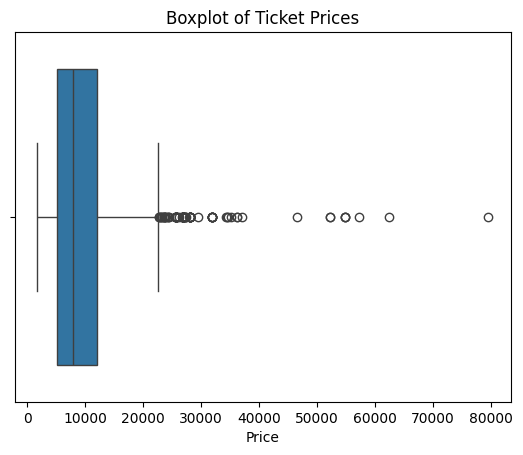

In [246]:
sns.boxplot(data=plane, x='Price')
plt.title('Boxplot of Ticket Prices')
plt.show()

- Terdapat banyak outlier dari data Price yang kemungkinan data Price yang dianggap oulier artinya tidak wajar tiket pesawat dengan harga segitu. Oleh karena itu sebaiknya dilakukan penghapusan outlier.

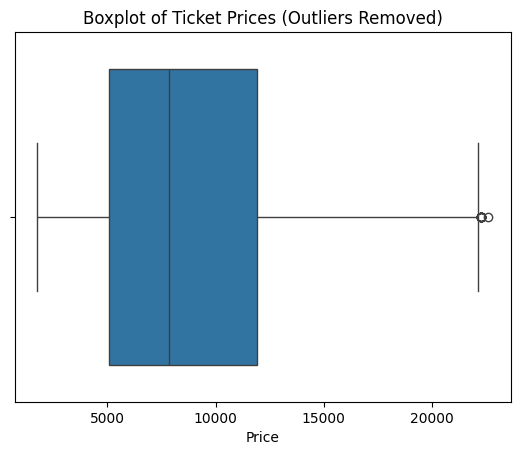

In [247]:
# Hitung Q1, Q3 dan IQR
Q1 = plane['Price'].quantile(0.25)
Q3 = plane['Price'].quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data yang tidak termasuk outlier
plane_no_outliers = plane[(plane['Price'] >= lower_bound) & (plane['Price'] <= upper_bound)]

# Boxplot setelah menghapus outlier
sns.boxplot(data=plane_no_outliers, x='Price')
plt.title('Boxplot of Ticket Prices (Outliers Removed)')
plt.show()

- Setelah dilakukan penghapusan outlier, terdapat masih ada 2 outlier yang sangat dekat dengan batas IQR, nilai ini sudah tidak perlu dihapus karena tidak terlalu berpengaruh untuk penganalisan selanjutnya sebab posisinya sudah sangat dekat dengan IQR.

### Exploratory Data Analysis - Univariate Analysis

In [248]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9740 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         9740 non-null   object
 1   Source          9740 non-null   object
 2   Destination     9740 non-null   object
 3   Total_Stops     9740 non-null   int64 
 4   Price           9740 non-null   int64 
 5   Date            9740 non-null   int64 
 6   Month           9740 non-null   int64 
 7   Year            9740 non-null   int64 
 8   Dep_hours       9740 non-null   int64 
 9   Dep_min         9740 non-null   int64 
 10  Arrival_hours   9740 non-null   int64 
 11  Arrival_min     9740 non-null   int64 
 12  Duration_hours  9740 non-null   int64 
 13  Duration_min    9740 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [249]:
categorical_features = [
    'Airline', 'Source', 'Destination'
]

numerical_features = [
    'Total_Stops', 'Date', 'Month', 'Year','Dep_hours', 'Dep_min',
    'Arrival_hours', 'Arrival_min',
    'Duration_hours', 'Duration_min'
]

target = 'Price'

- Dilakukan pendefinisian pada `categorical_features` yang berisi variabel kategorik yaitu ada `Airline`, `Source`, dan `Destination`
- Dilakukan pendefinisian pada `numerical_features` yang berisi variabel numerik yaitu ada `Total_hours`, `Date`, `Month`, `Year`, `Dep_hours`, `Dep_min`, `Arrival_hours`, `Arrival_min`, `Duration_hours`, dan `Duration_min`
- Variabel `Price` menjadi target karena model ini nantinya akan digunakan untuk memprediksi harga


=== Fitur: Airline ===
                                   Jumlah Sampel  Persentase (%)
Airline                                                         
Air Asia                                     319             3.3
Air India                                   1359            14.0
GoAir                                        194             2.0
IndiGo                                      2053            21.1
Jet Airways                                 3377            34.7
Jet Airways Business                           6             0.1
Multiple carriers                           1188            12.2
Multiple carriers Premium economy             13             0.1
SpiceJet                                     818             8.4
Trujet                                         1             0.0
Vistara                                      409             4.2
Vistara Premium economy                        3             0.0


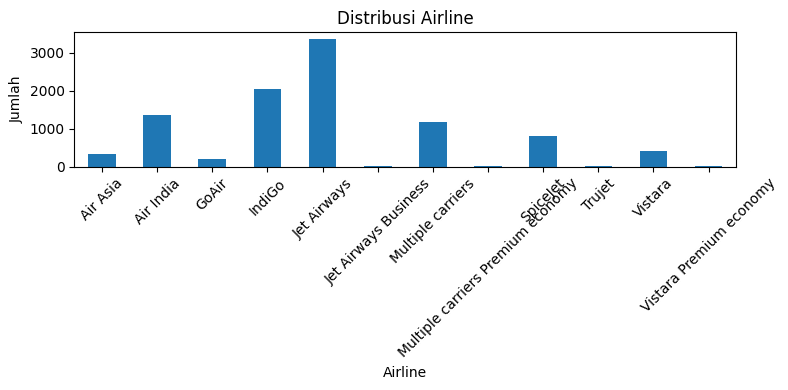


=== Fitur: Source ===
          Jumlah Sampel  Persentase (%)
Source                                 
Banglore           2121            21.8
Chennai             381             3.9
Delhi              4059            41.7
Kolkata            2501            25.7
Mumbai              678             7.0


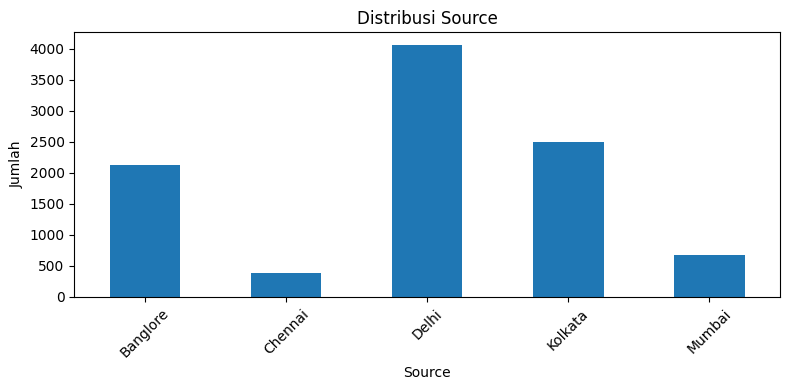


=== Fitur: Destination ===
             Jumlah Sampel  Persentase (%)
Destination                               
Banglore              2501            25.7
Cochin                4059            41.7
Delhi                 1265            13.0
Hyderabad              678             7.0
Kolkata                381             3.9
New Delhi              856             8.8


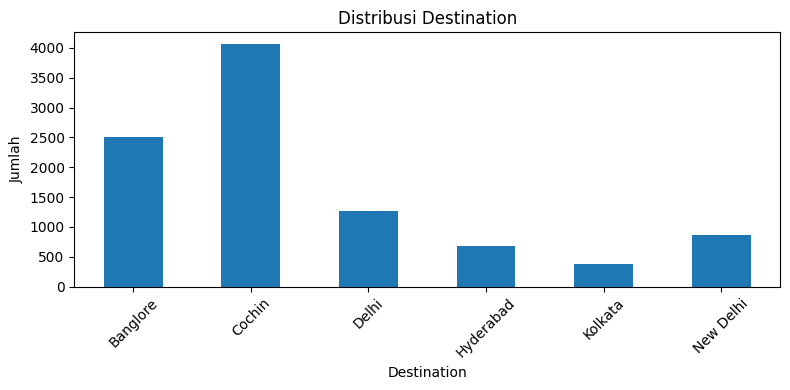

In [250]:
for feature in categorical_features:
    count = plane[feature].value_counts().sort_index()
    percent = 100 * plane[feature].value_counts(normalize=True).sort_index()

    plane_categorical = pd.DataFrame({
        'Jumlah Sampel': count,
        'Persentase (%)': percent.round(1)
    })

    print(f"\n=== Fitur: {feature} ===")
    print(plane_categorical)

    count.plot(kind='bar', title=f'Distribusi {feature}', figsize=(8,4))
    plt.ylabel('Jumlah')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- Pada diagram batang distribusi `Airline` terhadap jumlah, maskapai dengan jumlah tertinggi yaitu Jet Airways dengan jumlah sebanyak 3377 dan yang terendah adalah maskapai Trujet dengan jumlah 1.
- Pada diagram batang distribusi `Source`terhadap jumlah, tempat keberangkatan tertinggi yaitu di Delhi dengan jumlah 4059 dan yang terendah di Chennai dengan jumlah 381
- Pada diagram batang distribusi `Destination`terhadap jumlah, tujuan destinasi tertinggi yaitu Cochin dengan jumlah 4059 dan yang terendah di Kolkata dengan jumlah 381.

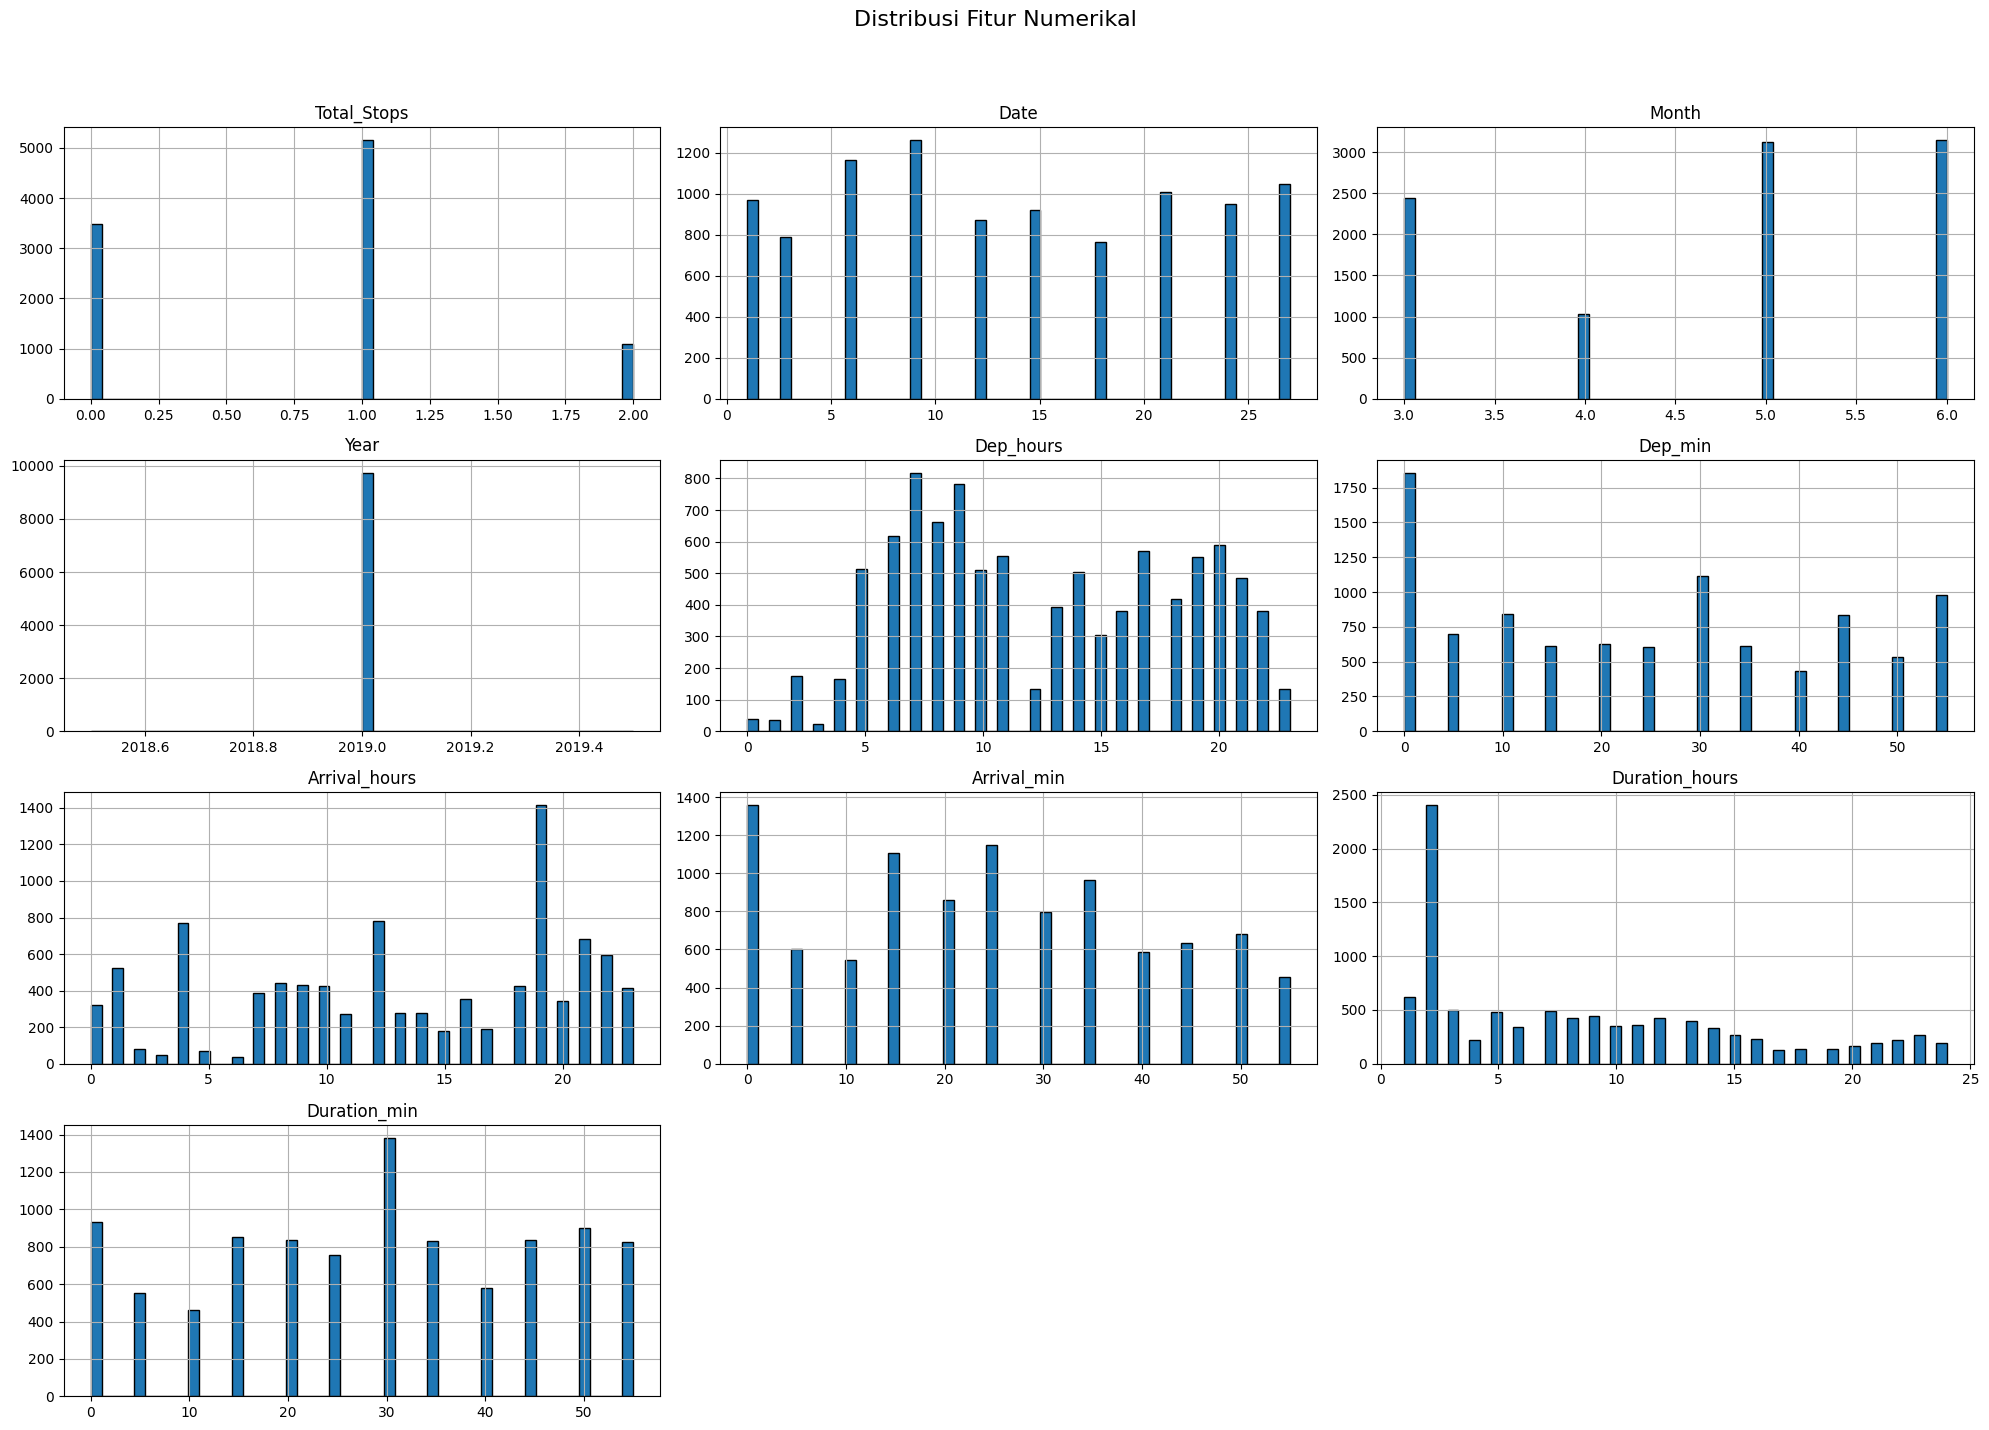

In [251]:
plane[numerical_features].hist(bins=50, figsize=(20, 15), color='#1f77b4', edgecolor='black')
plt.suptitle('Distribusi Fitur Numerikal', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Dari diagram batang Distribusi `Total_Stops`, jumlah total stop tertinggi yaitu di angka 1 yang artinya pesawat hanya transit 1 kali dan total stop terendah di angka 2 yang artinya pesawat melakukan  2 kali transit
- Dari diagram batang distribusi `Date`, tanggal tertinggi berada di batang ke empat atau sekitar tanggal 8 dan yang terendah berada di batang ke 2 yaitu sekitar tanggal 3
- Dari diagram batang distribusi `month`, bulan dengan jumlah penerbangan tertinggi terjadi pada bulan 6 atau bulan Juni dan yang terendah yaitu pada bulan ke 4 atau bulan April.
- Dari diagram batang distribusi `Year` terlihat hanya ada satu batang yaitu di tahun 2019, yang artinya data hanya pada rentang tahin 2019.
- Dari diagram batang distribusi `Dep_hours` terlihat bahwa jam keberangkatan pesawat tertinggi terjadi pada jam 7 dan yang terendah pada jam 3.
- Dari diagram batang distribusi `Dep_min` terlihat bahwa menit keberangkatan pesawat tertinggi pada menit 0, artinya pesawat lebih sering berangkat di jam yang tepat todak lebih beberapa menit. Dan keberangkatan pesawat terendah di menit 40.
- Dari diagram batang distribusi `Arrival_hours` terlihat bahwa pesawat sering tiba di pukul 19 dan paling jarang tiba di pukul 6.
- Dari diagram batang distribusi `Arrival_min` terlihat bahwa pesawat sering tiba di menit 0 dan paling jarang tiba di menit 55.
- Dari diagram batang distribusi `Duration_hours` terlihat bahwa lama penerbangan paling sering yaitu selama 2 jam dan yang paling jarang yaitu selama 17 jam.
- Dari diagram batang distribusi `Duration_min` terlihat bahwa durasi menit dalam penerbangan paling sering di menit 30 dan yang paling jarang dengan durasi menit 10.

<ipython-input-252-3d029ce46ca3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='Price', data=plane_no_outliers, palette='Set3', showfliers=False)


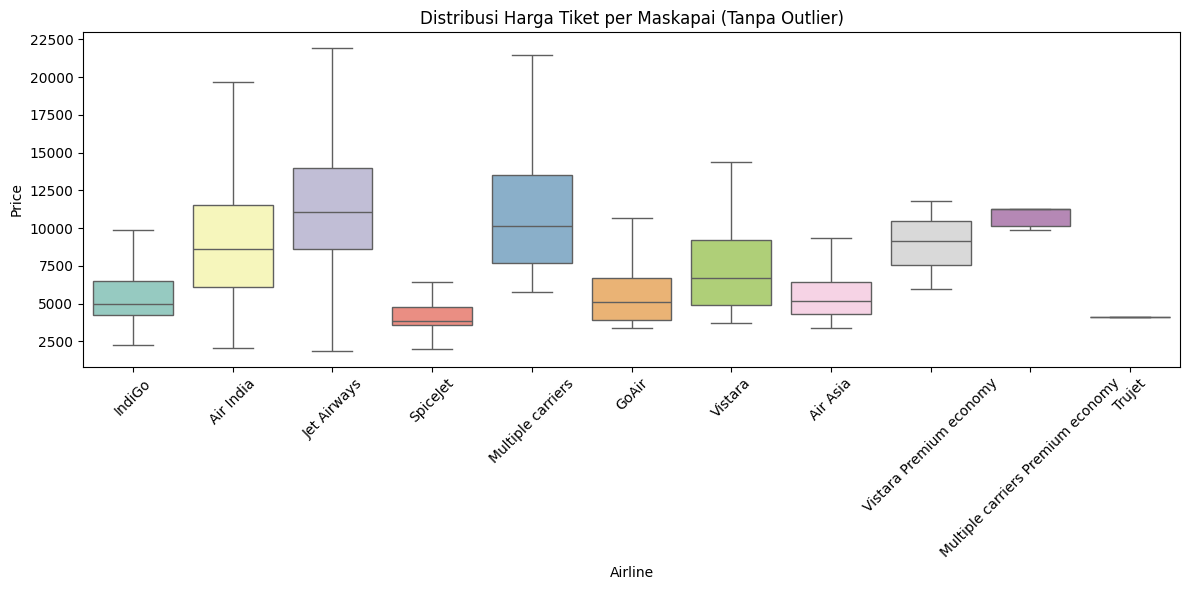

In [252]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=plane_no_outliers, palette='Set3', showfliers=False)
plt.title('Distribusi Harga Tiket per Maskapai (Tanpa Outlier)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Dari boxplot diagram `Airline` terhadap `Price` terlihat bahwa range harga terpanjang pada maskapai Jet Airways dengan menyediakan tiket paling murah hingga paling mahal dan range harga terpendek pada maskapai Trujet.

### Exploratory Data Analysis - Multivariate Analysis

<ipython-input-253-d9cd72f88bca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


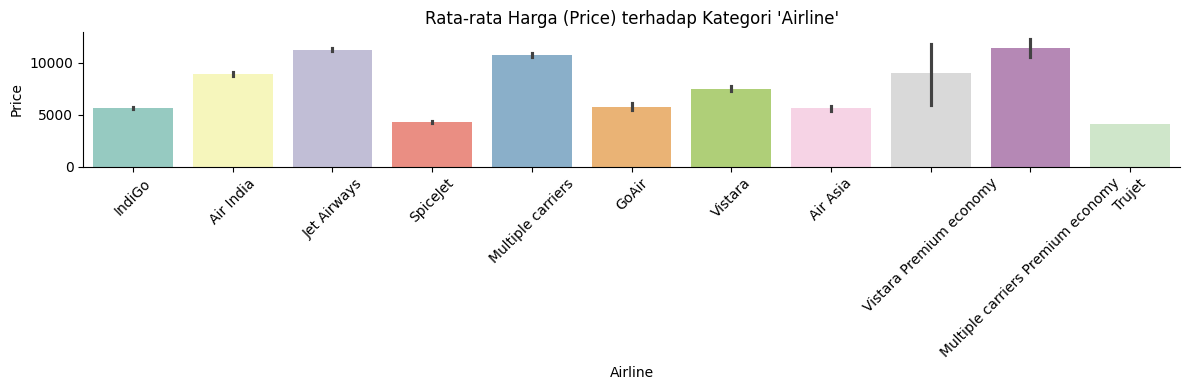

<ipython-input-253-d9cd72f88bca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


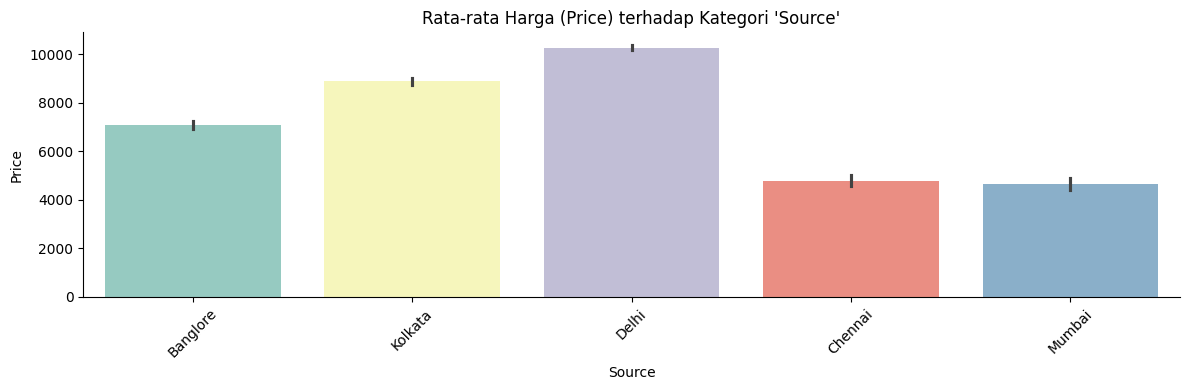

<ipython-input-253-d9cd72f88bca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


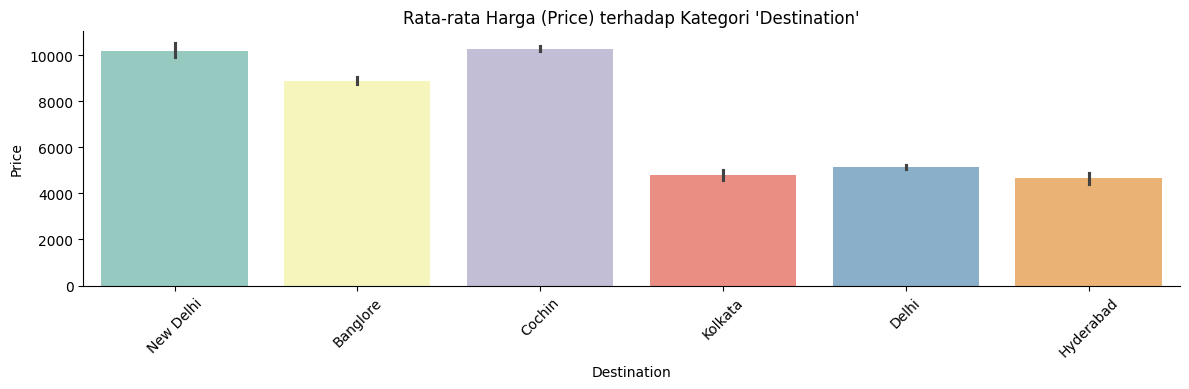

In [253]:
for col in categorical_features:
    sns.catplot(
        x=col,
        y="Price",
        kind="bar",
        data=plane_no_outliers,
        palette="Set3",
        height=4,
        aspect=3
    )
    plt.title(f"Rata-rata Harga (Price) terhadap Kategori '{col}'")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- Dari diagram hubungan variabel `Airline` dengan `Price` terlihat bahwa maskapai dengan harga tertinggi yaitu Multiple carriers Premium economy dan yang terendah Trujet.
- Dari diagram hubungan variabel `Source` dengan `Price` terlihat bahwa harga lokasi keberangkatan termahal berada di Delhi dan yang paling murah di Mumbai
- Dari diagram hubungan variabel `Destination` dengan `Price` terlihat bahwa harga lokasi pendaratan termahal berada di New Delhi dan Cochin. Untuk yang termurah berada di Hyderabad

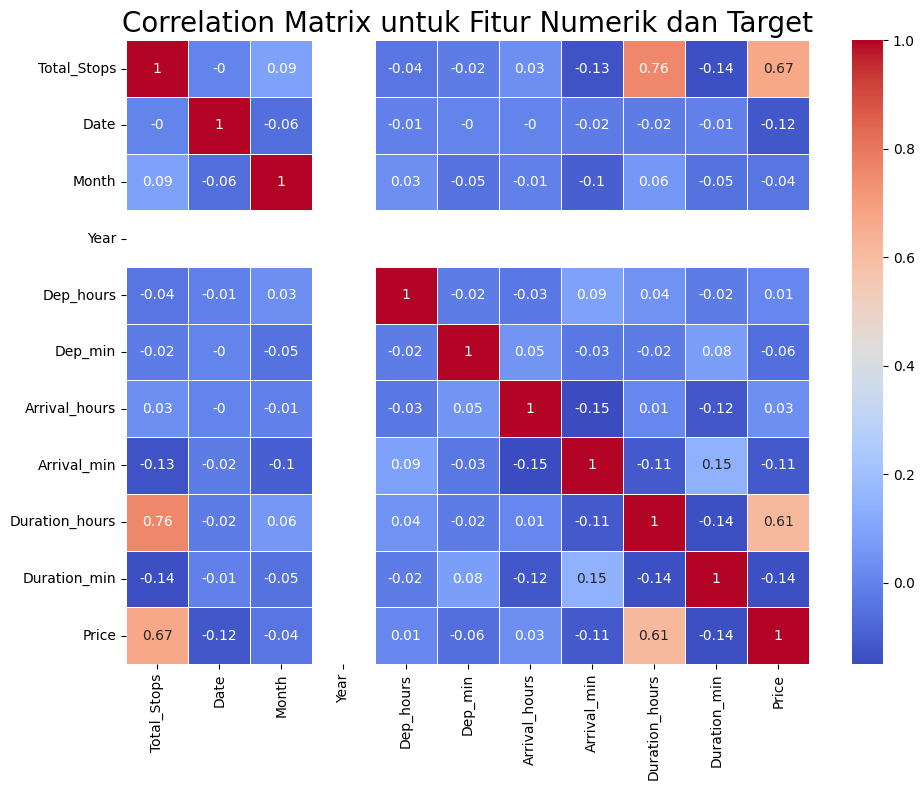

In [254]:
features_for_corr = [
    'Total_Stops', 'Date', 'Month', 'Year','Dep_hours', 'Dep_min',
    'Arrival_hours', 'Arrival_min',
    'Duration_hours', 'Duration_min',
    'Price'
]

correlation_matrix = plane_no_outliers[features_for_corr].corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Correlation Matrix untuk Fitur Numerik dan Target", size=20)
plt.tight_layout()
plt.savefig("correlation_matrix.png")
plt.show()

- Korelasi terkuat pada variabel `Total_Stops` dan `Duration_hours`yaitu sebesar 0,67
- Korelasi terendah pada variabel -0 yaitu pada variabel `Date` dan `Arrival_hours`, variabel `Date` dan `Dep_min`, sertabvariabel `Date` dan `Total_Stops`. Nilai -0 ini artinya tidak ada korelasi sama sekali antar variabel
- Korelasi `Year` tidak terlihat karena isi tahun hanya sama

## Data Preparation

### Hapus Duplikat

In [255]:
# Menghapus Duplikasi Data
plane = plane.drop_duplicates()
print("Jumlah setelah menghapus duplikasi: ", plane.shape)

Jumlah setelah menghapus duplikasi:  (9579, 14)


- Dilakukan penghapusan data yang duplikat, setelah dihapus terdapat sisa data sebanyak 9579 data dengan 14 kolom

### Filter Data

In [256]:
# Menggabungkan variabel date, month, year menjadi variabel Date_of_Journey
plane['Date_of_Journey'] = pd.to_datetime(
    plane['Date'].astype(str) + '-' +
    plane['Month'].astype(str) + '-' +
    plane['Year'].astype(str),
    format='%d-%m-%Y'
)

<ipython-input-256-c8f0ba69dacc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['Date_of_Journey'] = pd.to_datetime(


- Untuk mendapat hasil analisis yang lebih baik dilakukan penggabungan variabel `Date`, `Month`, dan `Year` menjadi variabel `Date_of_Journey`

In [257]:
# Membuat fitur turunan
plane['Day_of_week'] = plane['Date_of_Journey'].dt.dayofweek
plane['Is_weekend'] = plane['Day_of_week'].isin([5,6]).astype(int)

<ipython-input-257-101dfd085bde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['Day_of_week'] = plane['Date_of_Journey'].dt.dayofweek
<ipython-input-257-101dfd085bde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['Is_weekend'] = plane['Day_of_week'].isin([5,6]).astype(int)


- Setelah penggabungan menjadi variabel `Date_of_Journey` dilakukan fitur turunan menjadi variabel `Day_of_week` untuk mengetahui di hari apa penerbangan di jadwalkan dan variabel `Is_weekend` untuk mengetahui apakah penerbangan dilakukan di hari weekend atau tidak

In [258]:
# Menghapus variabel Date, Month, dan Year
plane.drop(['Date', 'Month', 'Year'], axis=1, inplace=True)

<ipython-input-258-97b3adf93325>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane.drop(['Date', 'Month', 'Year'], axis=1, inplace=True)


- Karena `Date`, `Month`, dan `Year` sudah digabung maka ketiga variabel ini dihapus

In [259]:
# Menghapus variabel Date_of_Journey
plane.drop(['Date_of_Journey'], axis=1, inplace=True)

<ipython-input-259-75e143563487>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane.drop(['Date_of_Journey'], axis=1, inplace=True)


- Karena sudah dilakukan fitur turunan dari `Date_of_Journey` maka variabel ini dapat dihapus

In [260]:
# Menggabungkan Duration_hours dan Duration_min menjadi variabel Duration_total_min
plane['Duration_total_min'] = plane['Duration_hours'] * 60 + plane['Duration_min']

- Untuk memudahkan dalam penganalisisan maka variabel `Duration_hours` dan `Duration_min` digabung menjadi `Duration_total_min` untuk mengetahui durasi penerbangan dalam bentuk menit

In [261]:
# Menghapus variabel Duration_hours dan Duration_min
plane.drop(['Duration_hours', 'Duration_min'], axis=1, inplace=True)

- Karena variabel `Duration_hours` dan `Duration_min` sudah digabung maka kedua variabel ini dihapus

In [262]:
# Menggabungkan Arrival_hours dan Arrival_min
plane['Arrival_total_min'] = plane['Arrival_hours'] * 60 + plane['Arrival_min']

- Untuk mempermudah dalam menganalisis maka variabel `Arrival_hours` dan `Arrival_min` digabung dalam bentuk menit dan menghasilkan variabel `Arrival_total_min` dengan bentuk akhir dalam bentuk menit

In [263]:
# Menghapus variabel Arrival_hours dan Arrival_min
plane.drop(['Arrival_hours', 'Arrival_min'], axis=1, inplace=True)

- Karena variabel `Arrival_hours` dan `Arrival_min` sudah digabung maka variabel ini dapat dihapus

In [264]:
# Menggabungkan variabel Dep_hours dan Dep_min
plane['Dep_total_min'] = plane['Dep_hours'] * 60 + plane['Dep_min']

- Untuk mempermudah dalam menganalisis maka variabel `Dep_hours` dan `Dep_min` digabung menjadi `Dep_total_min` dengan bentuk akhir berupa menit

In [265]:
# Menghapus variabel Dep_hours dan Dep_min
plane.drop(['Dep_hours', 'Dep_min'], axis=1, inplace=True)

- Karena variabel `Dep_hours` dan `Dep_min` sudah digabung maka kedua variabel ini dapat dihapus

In [266]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9579 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             9579 non-null   object
 1   Source              9579 non-null   object
 2   Destination         9579 non-null   object
 3   Total_Stops         9579 non-null   int64 
 4   Price               9579 non-null   int64 
 5   Day_of_week         9579 non-null   int32 
 6   Is_weekend          9579 non-null   int64 
 7   Duration_total_min  9579 non-null   int64 
 8   Arrival_total_min   9579 non-null   int64 
 9   Dep_total_min       9579 non-null   int64 
dtypes: int32(1), int64(6), object(3)
memory usage: 785.8+ KB


- Hail akhirnya terdapat 9579 data dengan 10 variabel yaitu variabel `Airline`, `Source`, `Destination`, `Total_Stops`, `Price`, `Day_of_week`, `Is_weekend`, `Duration_total_min`, `Arrival_total_min`, dan `Dep_total_min`

In [267]:
plane.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_week,Is_weekend,Duration_total_min,Arrival_total_min,Dep_total_min
0,IndiGo,Banglore,New Delhi,0,3897,6,1,170,70,1340
1,Air India,Kolkata,Banglore,2,7662,2,0,445,795,350
2,Jet Airways,Delhi,Cochin,2,13882,6,1,1140,265,565
3,IndiGo,Kolkata,Banglore,1,6218,6,1,325,1410,1085
4,IndiGo,Banglore,New Delhi,1,13302,4,0,285,1295,1010


### Encoding Fitur Kategori

In [268]:
# Buat ulang plane_no_outliers dari plane yang sudah lengkap
Q1 = plane['Price'].quantile(0.25)
Q3 = plane['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plane_no_outliers = plane[(plane['Price'] >= lower_bound) & (plane['Price'] <= upper_bound)]

- Karena ada perubahan variabel maka dilakukan pendefinisian ulang pada plane_no_outliers

In [269]:
categorical_features = [
    'Airline', 'Source', 'Destination'
]

numerical_features = [
    'Total_Stops', 'Day_of_week',
    'Is_weekend', 'Duration_total_min',
    'Arrival_total_min', 'Dep_total_min'
]

target = 'Price'

features = categorical_features + numerical_features
plane_model = plane_no_outliers[features + [target]].copy()

# One-hot encoding
plane_encoded = pd.get_dummies(plane_model, columns=categorical_features, dtype=int, drop_first=True)

print(plane_encoded.head())

   Total_Stops  Day_of_week  Is_weekend  Duration_total_min  \
0            0            6           1                 170   
1            2            2           0                 445   
2            2            6           1                1140   
3            1            6           1                 325   
4            1            4           0                 285   

   Arrival_total_min  Dep_total_min  Price  Airline_Air India  Airline_GoAir  \
0                 70           1340   3897                  0              0   
1                795            350   7662                  1              0   
2                265            565  13882                  0              0   
3               1410           1085   6218                  0              0   
4               1295           1010  13302                  0              0   

   Airline_IndiGo  ...  Airline_Vistara Premium economy  Source_Chennai  \
0               1  ...                                0          

- Melakukan encoding pada fitur kategorik

### Train-Test-Split

In [270]:
X = plane_encoded.drop(["Price"], axis=1)
y = plane_encoded["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=123
)

- Membagi data train dan test

In [271]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 9487
Total # of sample in train dataset: 8538
Total # of sample in test dataset: 949


- Dari total 9487 data, sebanyak 8538 data untuk train, dan 949 data untuk test

### Standarisasi

In [272]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])

# Transform data latih dan uji
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
print(X_train[numerical_features].head())

      Total_Stops  Day_of_week  Is_weekend  Duration_total_min  \
1847     0.423253     1.529899    1.548397            2.039347   
9823     0.423253     0.042563   -0.645829           -0.737006   
8545     0.423253    -0.453215   -0.645829            0.138421   
5588     0.423253    -1.444772   -0.645829            0.138421   
483      0.423253     0.042563   -0.645829            0.013360   

      Arrival_total_min  Dep_total_min  
1847           0.869965       1.429184  
9823          -0.483413      -1.151718  
8545           0.386616      -1.122719  
5588           0.386616      -1.122719  
483            0.773295      -0.513742  


- Untuk menyamakan skala fitur yanga ada dilakukan standarisasi

In [273]:
print(X_train[numerical_features].describe().round(4))

       Total_Stops  Day_of_week  Is_weekend  Duration_total_min  \
count    8538.0000    8538.0000   8538.0000           8538.0000   
mean        0.0000      -0.0000     -0.0000              0.0000   
std         1.0001       1.0001      1.0001              1.0001   
min        -1.1722      -1.4448     -0.6458             -1.1497   
25%        -1.1722      -0.9490     -0.6458             -0.9121   
50%         0.4233       0.0426     -0.6458             -0.2117   
75%         0.4233       1.0341      1.5484              0.6637   
max         2.0187       1.5299      1.5484              2.4020   

       Arrival_total_min  Dep_total_min  
count          8538.0000      8538.0000  
mean              0.0000        -0.0000  
std               1.0001         1.0001  
min              -1.9697        -2.1957  
25%              -0.7372        -0.8617  
50%               0.0604        -0.1948  
75%               0.8095         0.9362  
max               1.4862         1.9077  


## Model Development

### K-Nearest Neighbor

In [274]:
# Menyiapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [275]:
# Inisialisasi dan latih model
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

# Hitung MSE untuk train dan test
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

models.loc['train_mse', 'KNN'] = mean_squared_error(y_train, y_train_pred)
models.loc['test_mse', 'KNN'] = mean_squared_error(y_test, y_test_pred)

### Random Forest

In [276]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_train, y_train_pred)
models.loc['test_mse', 'RandomForest'] = mean_squared_error(y_test, y_test_pred)

### Boosting Algorithm

In [277]:
# Inisialisasi dan latih model boosting
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)

y_train_pred = boosting.predict(X_train)
y_test_pred = boosting.predict(X_test)

models.loc['train_mse', 'Boosting'] = mean_squared_error(y_train, y_train_pred)
models.loc['test_mse', 'Boosting'] = mean_squared_error(y_test, y_test_pred)

## Evaluasi Model

In [278]:
# Scaling X_test menggunakan scaler yang sudah fit dari X_train
X_test_scaled = X_test.copy()
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

In [279]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train)) / 1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test)) / 1e3

mse

,train,test
KNN,4265.338616,4727.798823
RF,2327.643793,4176.975962
Boosting,6529.342032,6123.370864


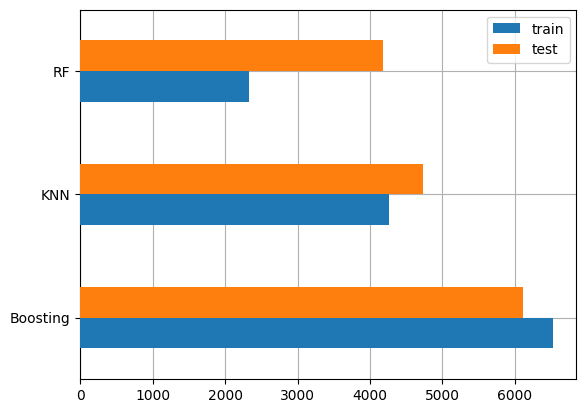

In [280]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
fig.savefig("plot_evaluasimetrik1.png")

- Dari evaluasi yang telah dilakukan nilai mse yang terbaik yaitu pada model Random Forest dan yang terburuk pada Boosting

In [281]:
prediksi = X_test.iloc[:1].copy()

pred_dict = {'y_true': y_test.iloc[:1].values[0]}
for name, model in model_dict.items():
    pred_dict[f'prediksi_{name}'] = model.predict(prediksi)[0].round(1)

pd.DataFrame([pred_dict])

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
0,7438,12504.6,12972.1,12816.9


- Prediksi yang terdekat dengan nilai aktual yaitu model KNN namun nilainya masih terlalu jauh sehingga diperlukan tuning model

## Tuning

In [282]:
knn_params = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_knn = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
print("Best KNN Params:", grid_knn.best_params_)

Best KNN Params: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


- Best parameter KNN yaitu ketika n_neighbors sebesar 10, p sebesar 1, dan weights nya uniform

In [283]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 16, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=55),
    rf_params,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_
print("Best Params:", random_search.best_params_)

Best Params: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}


- Best parameter pada model random forest terjadi ketika n_estimators sebesar 50, min_samples_split nya 2, min_samples_leaf nya 2, max_features nya none, dan max_depth sebesar 10.

In [284]:
boosting_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'loss': ['linear', 'square', 'exponential']
}

grid_boost = GridSearchCV(AdaBoostRegressor(random_state=55), boosting_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_boost.fit(X_train, y_train)

best_boost = grid_boost.best_estimator_
print("Best Boosting Params:", grid_boost.best_params_)

Best Boosting Params: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 200}


- Best parameter pada Boosting yaitu ketika learning_rate nya 0.01, loss nya linear, dan n_estimators nya 200

In [285]:
model_dict = {
    'KNN': best_knn,
    'RF': best_rf,
    'Boosting': best_boost
}

- Membuat dictionary model

## Evaluasi Setelah Tuning

In [286]:
from sklearn.metrics import mean_squared_error
eval_mse = pd.DataFrame(columns=['train_MSE', 'test_MSE'])

for name, model in model_dict.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    eval_mse.loc[name, 'train_MSE'] = mean_squared_error(y_train, y_train_pred)
    eval_mse.loc[name, 'test_MSE'] = mean_squared_error(y_test, y_test_pred)
print(eval_mse)

               train_MSE        test_MSE
KNN       4126519.224565  4573659.111391
RF        3397884.162461  3682727.457989
Boosting  6422229.830446  5973400.421522


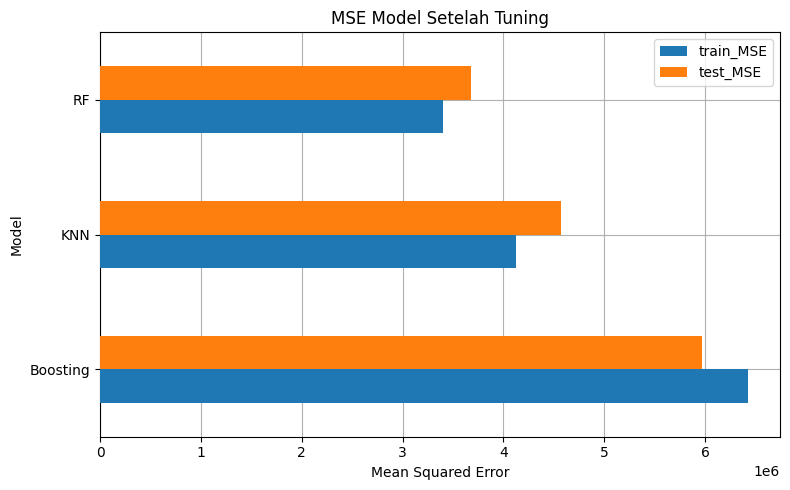

In [287]:
eval_mse_sorted = eval_mse.sort_values('test_MSE', ascending=False)

fig, ax = plt.subplots(figsize=(8, 5))
eval_mse_sorted[['train_MSE', 'test_MSE']].plot(kind='barh', ax=ax, zorder=3)

ax.set_title("MSE Model Setelah Tuning")
ax.set_xlabel("Mean Squared Error")
ax.set_ylabel("Model")
ax.grid(zorder=0)
plt.tight_layout()
plt.show()

- Dari evaluasi ketiga model setelah tuning Random Forest adalah model terbaik karena nilai MSE paling rendah diantara model yang lain

In [288]:
prediksi = X_test_scaled.iloc[:1].copy()
pred_dict = {'y_true': y_test.iloc[:1].values[0]}

for name, model in model_dict.items():
    pred_dict[f'prediksi_{name}'] = model.predict(prediksi)[0].round(1)

pd.DataFrame([pred_dict])

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
0,7438,14528.6,4328.6,4981.5


- Nilai prediksi Boosting Algorithm lebih mendekati nilai aktual dibandingkan dengan KNN dan Random Forest

##Kesimpulan:##
Meskipun pada prediksi yang terbaik adalah Boosting Algorithm namun Random Forest adalah model yang terbaik karena nilai MSE terkecil. Sebab lebih baik mengutamakan kestabilan error individual dari pada perbandingan nilai prediksi dan nilai aktual